# Vibrations modes of a hanging chain using the Ritz method

The equation of the vibration of a hanging chain

$$\mu\frac{\partial^2}{\partial t^2} u(z, t) = \frac{\partial}{\partial z}\left(gz\frac{\partial}{\partial z}u(z,t)\right)$$

If we assume a solution of the form $u(z, t) = e^{i\omega t} w(z)$, we can rewrite the
differential equation as

$$-k^2 w(z) = \frac{\partial}{\partial z}\left(z\frac{\partial}{\partial z}w(z)\right)$$

with $k^2 = \mu \omega^2/g$, and $z(0)=0$, $\partial w(L)/\partial z = 0$.

This can be written in variational form as

$$J = \int_0^L z \left[\frac{\partial w}{\partial z}\right]^2 dz + k^2\int_0^L w^2 dz$$

In [1]:
import numpy as np
from sympy import *
from scipy.linalg import eigh
from scipy.special import jn_zeros as Jn_zeros, jn as Jn
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

init_session()

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [3]:
k, L = symbols('k L', positive=True)

In [4]:
def u_fun(x, m):
    """ Trial function. """
    c = symbols('c0:%i' % m)
    w = (1 - z)**2 * sum(c[k]*x**k for k in range (0, m))
    return w, c

In [5]:
m = 10
w, coef = u_fun(z, m)
display(w)

In [6]:
T_inte = w**2
U_inte = z*diff(w, z)**2

In [7]:
T = integrate(T_inte, (z, 0, 1))
U = integrate(U_inte, (z, 0, 1))

In [8]:
K = Matrix(m, m, lambda ii, jj: diff(U, coef[ii], coef[jj]))
M = Matrix(m, m, lambda ii, jj: diff(T, coef[ii], coef[jj]))

In [9]:
Kn = np.array(K).astype(np.float64)
Mn = np.array(M).astype(np.float64)

We can compare the eigenvalues obtained using the Ritz method and the analytic ones,
that are given by

$$k_n = \frac{\alpha}{2\sqrt{L}}\, ,$$

where $\alpha_n$ is the $n$th zero of the Bessel function of the first kind and zero order
$\mathrm{J}_0$.

In [10]:
vals, vecs = eigh(Kn, Mn, eigvals=(0, m-1))
np.sqrt(vals)

array([ 1.20697368,  2.77048517,  4.34317319,  5.91785046,  7.49327331,
        9.0664579 , 10.70798059, 12.66038181, 16.73615486, 23.4575171 ])

In [11]:
lam = Jn_zeros(0, m)/2
lam

array([ 1.20241278,  2.76003906,  4.32686396,  5.89576722,  7.46545885,
        9.03553198, 10.60581831, 12.17623577, 13.74673957, 15.31730323])

<IPython.core.display.Javascript object>


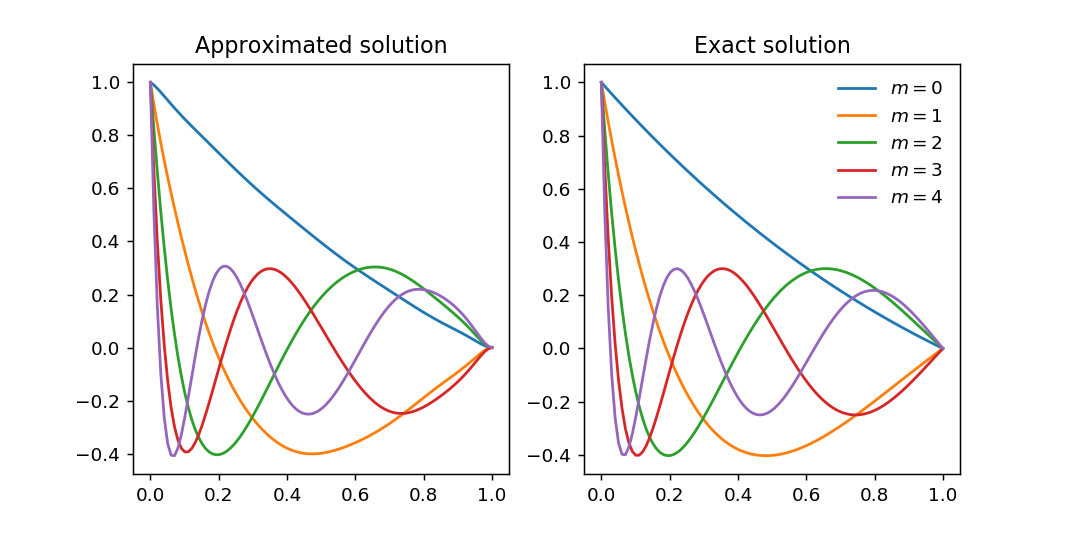

In [12]:
z_vec = np.linspace(0, 1, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
for num in range(5):
    u_num = lambdify((z), w.subs({coef[kk]: vecs[kk, num] for kk in range(m)}), "numpy")  
    ax1.plot(z_vec, u_num(z_vec)/u_num(0))
    ax2.plot(z_vec, Jn(0, 2*lam[num]*np.sqrt(z_vec)), label=r"$m=%i$"%num)

ax1.set_title("Approximated solution")
ax2.set_title("Exact solution")
plt.legend(loc="best", framealpha=0);

## References

1. Yong, DH. Strings, chains, and ropes. SIAM Rev. 2006;48(4): 771-781.